Importing the Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [43]:
df=pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [44]:
# X=df.drop(['Salary'],axis=1)
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [45]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [46]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [47]:
y=y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [49]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

Training the SVR model on the whole dataset

In [50]:
from sklearn.svm import SVR
model=SVR(kernel='rbf')
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Predicting a new Result

In [51]:
# sc_y.inverse_transform(model.predict(sc_x.transform([[6.5]])))
sc_y.inverse_transform(model.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

Visulaizing the SVR results

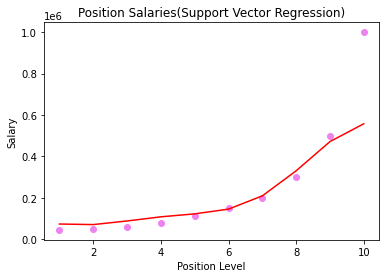

In [52]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='violet')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(model.predict(X)),color='red')
plt.title('Position Salaries(Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Visualizing the SVR results(for higher resolution and smoother curve)

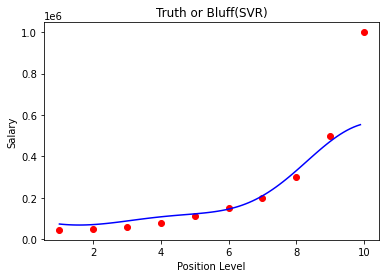

In [55]:
X_grid=np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(model.predict(sc_X.transform(X_grid))),color='blue')
plt.title('Truth or Bluff(SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()